<a href="https://colab.research.google.com/github/R21Rash/Lab2/blob/main/ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Targets: [5 8 6 6 3 5 9 3 5 5]


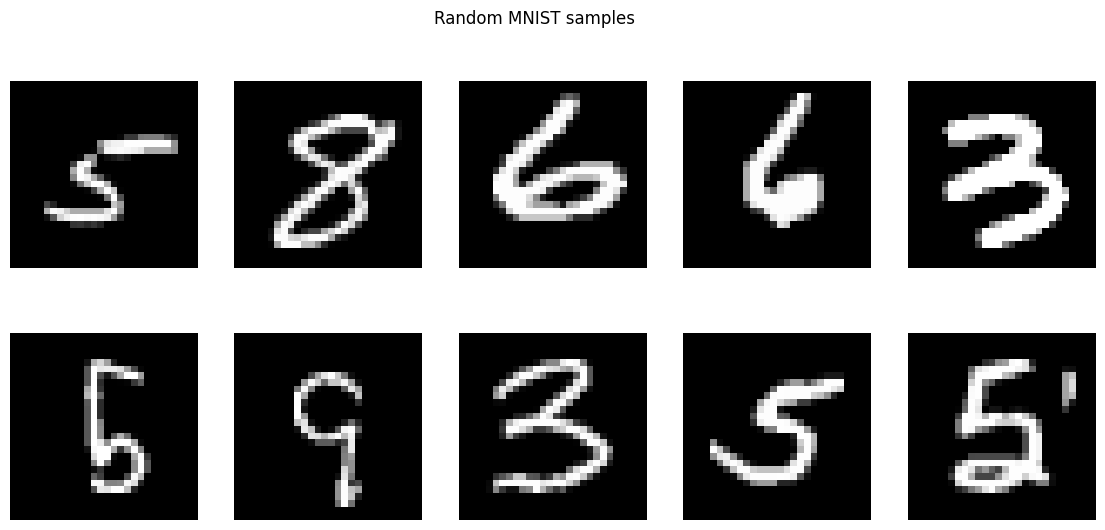

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7568 - loss: 0.8033
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9512 - loss: 0.1647
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9673 - loss: 0.1105
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9741 - loss: 0.0857
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9787 - loss: 0.0726
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9816 - loss: 0.0607
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9836 - loss: 0.0537
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9868 - loss: 0.0424
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9874 - loss: 0.0400
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9890 - loss: 0.0342
BASELINE → Test accuracy: 0.9740


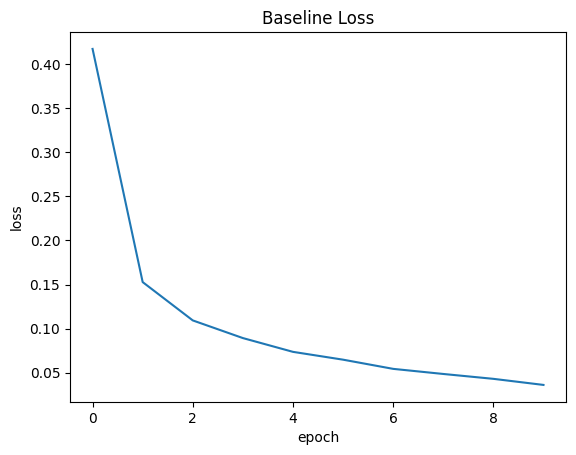

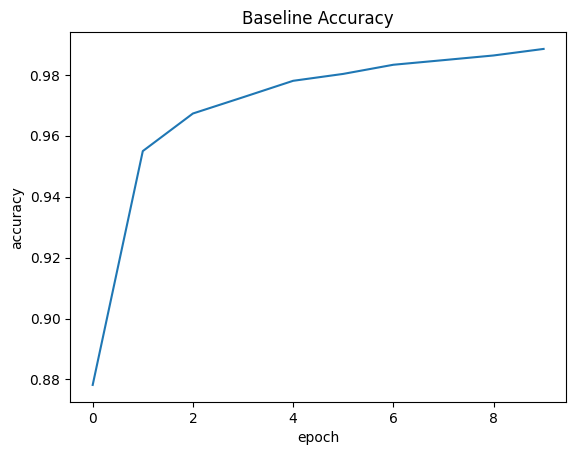

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8276 - loss: 0.5657 - val_accuracy: 0.9713 - val_loss: 0.1013 - learning_rate: 0.0010
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9578 - loss: 0.1414 - val_accuracy: 0.9758 - val_loss: 0.0799 - learning_rate: 0.0010
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9704 - loss: 0.0958 - val_accuracy: 0.9788 - val_loss: 0.0723 - learning_rate: 0.0010
Epoch 4/25
395/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9764 - loss: 0.0736

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-2413627086.py", line 78, in <cell line: 0>
    hist_tuned = tuned.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.1, callbacks=cbs, verbose=1)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 377, in fit
    logs = self.train_function(iterator)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function
    opt_outputs = mu

TypeError: object of type 'NoneType' has no len()

In [1]:
# ============================
# MNIST MLP — Colab-ready
# ============================

# Imports
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers, callbacks
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1) Load data
(train_data, train_target), (test_data, test_target) = mnist.load_data()

# 2) Visualize a few samples
fig, axs = plt.subplots(2, 5, figsize=(14, 6))
idxs = np.random.randint(0, 60000, 10)
print("Targets:", train_target[idxs])
for i, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[idxs[i]], cmap='gray')
    ax.axis('off')
plt.suptitle("Random MNIST samples")
plt.show()

# 3) Preprocess
x_train = train_data.astype("float32") / 255.0
x_test  = test_data.astype("float32") / 255.0
y_train = to_categorical(train_target, num_classes=10)
y_test  = to_categorical(test_target,  num_classes=10)

# 4) Baseline model (simple MLP)
def build_baseline():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

baseline = build_baseline()
hist_base = baseline.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1)
loss_b, acc_b = baseline.evaluate(x_test, y_test, verbose=0)
print(f"BASELINE → Test accuracy: {acc_b:.4f}")

# Plot training curves (baseline)
plt.plot(hist_base.history['loss']); plt.xlabel('epoch'); plt.ylabel('loss'); plt.title('Baseline Loss'); plt.show()
plt.plot(hist_base.history['accuracy']); plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.title('Baseline Accuracy'); plt.show()

# 5) Tuned model (bigger net + dropout + callbacks)
def build_tuned():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax'),
    ])
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

cbs = [
    callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, verbose=1),
    callbacks.EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True, verbose=1),
]

tuned = build_tuned()
hist_tuned = tuned.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.1, callbacks=cbs, verbose=1)
loss_t, acc_t = tuned.evaluate(x_test, y_test, verbose=0)
print(f"TUNED → Test accuracy: {acc_t:.4f}")

# 6) L2 regularization model
def build_l2(l2=1e-4):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        Dropout(0.3),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        Dropout(0.3),
        Dense(10, activation='softmax'),
    ])
    model.compile(optimizer=optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_l2 = build_l2(l2=1e-4)
hist_l2 = model_l2.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.1, callbacks=cbs, verbose=1)
loss_l2, acc_l2 = model_l2.evaluate(x_test, y_test, verbose=0)
print(f"L2 → Test accuracy: {acc_l2:.4f}")

# 7) L1 + L2 regularization model
def build_l1l2(l1=1e-6, l2=1e-4):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        Dropout(0.3),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
        Dropout(0.3),
        Dense(10, activation='softmax'),
    ])
    model.compile(optimizer=optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_l1l2 = build_l1l2(l1=1e-6, l2=1e-4)
hist_l1l2 = model_l1l2.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.1, callbacks=cbs, verbose=1)
loss_l1l2, acc_l1l2 = model_l1l2.evaluate(x_test, y_test, verbose=0)
print(f"L1+L2 → Test accuracy: {acc_l1l2:.4f}")

# 8) Pick your best model for confusion matrix
best_model = max(
    [('baseline', baseline, acc_b),
     ('tuned', tuned, acc_t),
     ('l2', model_l2, acc_l2),
     ('l1l2', model_l1l2, acc_l1l2)],
    key=lambda t: t[2]
)[1]

# 9) Confusion matrix + per-class report
y_prob = best_model.predict(x_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("MNIST Confusion Matrix (Best Model)")
plt.show()

print(classification_report(y_true, y_pred, digits=4))

per_class_acc = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_acc):
    print(f"Class {cls}: {acc:.4f}")

# 10) Save weights if you want
best_model.save_weights("MNIST_WEIGHTS.h5")
print("Saved best model weights to MNIST_WEIGHTS.h5")
